In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

# Ejercicio N° 1
El dataset  student_data.csv contiene información sobre el promedio de horas semanales de estudio que un conjunto de estudiantes dedicó para la preparación de un examen y la calificación final recibida luego de rendirlo.

In [2]:
# cargar el archivo csv
data = pd.read_csv('Datasets_Unidad_6\student_data.csv', skiprows=0)

In [3]:
data.head()

,Unnamed: 0,hours_studied,exam_scores
0,1,9.3,63.1
1,2,23.9,90.4
2,3,12.9,63.2
3,4,26.6,87.8
4,5,28.3,92.9


#### **1.  Realice un gráfico que le permita visualizar la relación existente entre las calificaciones finales y las horas de estudio del grupo de estudiantes. ¿Cómo describiría dicha relación a partir de lo observado?**

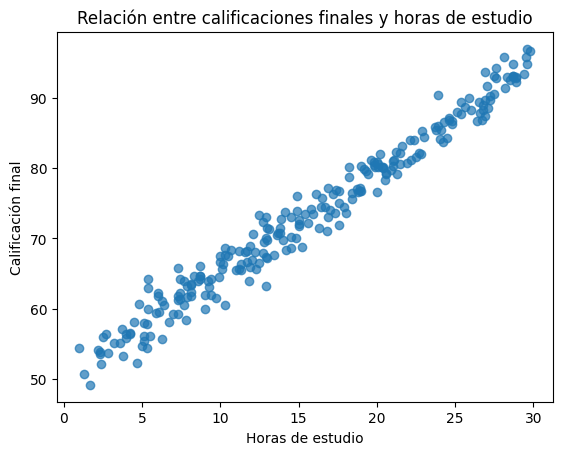

In [4]:
# crear el gráfico de dispersión
plt.scatter(data['hours_studied'], data['exam_scores'], alpha=0.7)
plt.title('Relación entre Calificaciones Finales y Horas de Estudio')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación Final')

# agregar etiquetas de eje y título
plt.xlabel('Horas de estudio')
plt.ylabel('Calificación final')
plt.title('Relación entre calificaciones finales y horas de estudio')

# mostrar el gráfico
plt.show()

rta: Describiria la relacion como: mientras mas horas de estudio mayor sera la calificacion final

#### **2.  A partir de los datos, ajuste un modelo de regresión lineal para la calificación final del examen en función de las horas semanales de estudio.**

**Modelo**

$ calificacion final = b_0 + b(hours_studied) * hours_studies $ 

In [33]:
model = smf.ols('exam_scores ~ hours_studied', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            exam_scores   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     8555.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        13:47:56   Log-Likelihood:                -512.26
No. Observations:                 245   AIC:                             1029.
Df Residuals:                     243   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.2541      0.278    180.576      0.000      49.706      50.802
hours_studied     1.4750      0.016     92.493      0.000       1.444       1.506
==============================================================================
Omnibus:                        0.876   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.585
Skew:                          -0.007   Prob(JB):                        0.747
Kurtosis:                       3.239   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **3.  Escriba dicho modelo en forma desarrollada e interprete cada uno de los coeficientes que lo componen.**

El modelo de regresión lineal ajustado es:

Calificación final = 50.2541 + 1.4750 * Horas de estudio

Donde "Calificación final" es la variable dependiente y "Horas de estudio" es la variable independiente.

El coeficiente de intersección (50.2541) indica que si un estudiante no estudia en absoluto (Horas de estudio = 0), se espera que su calificación final sea de 50.2541.

El coeficiente de la variable independiente (1.4750) indica que por cada hora adicional de estudio, se espera que la calificación final aumente en 1.4750 puntos.

El valor p asociado con el coeficiente de la variable independiente es muy pequeño (menor que 0.05), lo que indica que es estadísticamente significativo y que la relación entre las horas de estudio y la calificación final es significativa.

# Ejercicio N° 2

Utilizando el dataset  dataset_rendimiento.csv , que contiene información sobre 235 estudiantes universitarios de segundo año de una institución universitaria en relación a las horas semanales promedio de estudio dedicadas, el tipo de desayuno que consumen antes de los exámenes y el rendimiento medio en los exámenes parciales:

In [34]:
data = pd.read_csv('Datasets_Unidad_6\dataset_rendimiento.csv')

In [36]:
data.head()

,Horas_de_Estudio,Desayuno,Rendimiento
0,9,Saludable,64.0
1,9,Ninguno,84.2
2,12,Ninguno,66.9
3,10,Saludable,82.9
4,12,Ninguno,90.6


#### **1.  Ajuste un modelo de regresión lineal que permita predecir el rendimiento promedio de estudiantes de segundo año a partir del número de horas semanales promedio de estudio y el tipo de desayuno que consumen.**

$ Rendimiento = b_0 + b(HorasDeEstudio) * HorasDeEstudio + b(Desayuno) * Desayuno  $

In [40]:
modelo = smf.ols('Rendimiento ~ Horas_de_Estudio + Desayuno', data=data)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Rendimiento   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     48.47
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           2.46e-24
Time:                        13:54:30   Log-Likelihood:                -880.27
No. Observations:                 235   AIC:                             1769.
Df Residuals:                     231   BIC:                             1782.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                62.2677      1.749     35.609      0.000      58.822      65.713
Desayuno[T.Regular]      -1.0045      1.621     -0.620      0.536      -4.198       2.189
Desayuno[T.Saludable]    -3.7436      1.650     -2.268      0.024      -6.995      -0.492
Horas_de_Estudio          1.9850      0.171     11.602      0.000       1.648       2.322
==============================================================================
Omnibus:                        2.278   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                2.173
Skew:                          -0.235   Prob(JB):                        0.337
Kurtosis:                       2.986   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **2.  ¿Cuál/es de las variables incluidas contribuye/n significativamente a explicar el rendimiento de los estudiantes? Justifique.**

Las variables que contribuyen significativamente al modelo son Horas_de_Estudio y Desayuno[T.Saludable], ya que tienen un valor p < 0.05.

Por otro lado las variables que no contribuyen al modelo son aquellas que tienen un p-valor mayor a 0.05. En este caso, la variable Desayuno[T.Regular] tiene un p-valor de 0.536, por lo que no contribuye al modelo.

#### **3.  Utilizando el modelo ajustado, prediga el rendimiento promedio que presentará un estudiante que dedica, en promedio, 5.5 horas semanales de estudio y posee la costumbre de consumir un desayuno saludable previo a las instancias de examen**

In [68]:
# crear un nuevo dataframe con los registros donde el desayuno es saludable
new_data = data.loc[data['Desayuno'] == 'Saludable']

modelo = smf.ols('Rendimiento ~ Horas_de_Estudio', data=new_data)
modelo = modelo.fit()

prediccion = modelo.predict({'Horas_de_Estudio': [5.5]})
prediccion




0    69.346344
dtype: float64
